In [1]:
import pandas as pd
import kagglehub
import os
from wordcloud import WordCloud

In [2]:
path = kagglehub.dataset_download("sid321axn/amazon-alexa-reviews")

In [3]:
print("Dataset stored at:", path)

Dataset stored at: /home/sudarshan/.cache/kagglehub/datasets/sid321axn/amazon-alexa-reviews/versions/3


In [4]:
print("Files:", os.listdir(path)) 

Files: ['amazon_alexa.tsv']


In [5]:
tsv_path = os.path.join(path, "amazon_alexa.tsv")

In [6]:
df = pd.read_csv(tsv_path, sep="\t")

In [7]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [8]:
df.columns

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')

In [9]:
df.isnull().sum()


rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

In [10]:
df[df["verified_reviews"].isna() == True]
df.dropna(inplace=True)
df['length'] = df['verified_reviews'].apply(len)

print(f"'verified_reviews' column value: {df.iloc[10]['verified_reviews']}")
print(f"length of the review : {len(df.iloc[10]['verified_reviews'])}")
print(f"'length' column value : {df.iloc[10]['length']}")


'verified_reviews' column value: I sent it to my 85 year old Dad, and he talks to it constantly.
length of the review : 63
'length' column value : 63


In [11]:
df.head

<bound method NDFrame.head of       rating       date         variation  \
0          5  31-Jul-18  Charcoal Fabric    
1          5  31-Jul-18  Charcoal Fabric    
2          4  31-Jul-18    Walnut Finish    
3          5  31-Jul-18  Charcoal Fabric    
4          5  31-Jul-18  Charcoal Fabric    
...      ...        ...               ...   
3145       5  30-Jul-18        Black  Dot   
3146       5  30-Jul-18        Black  Dot   
3147       5  30-Jul-18        Black  Dot   
3148       5  30-Jul-18        White  Dot   
3149       4  29-Jul-18        Black  Dot   

                                       verified_reviews  feedback  length  
0                                         Love my Echo!         1      13  
1                                             Loved it!         1       9  
2     Sometimes while playing a game, you can answer...         1     195  
3     I have had a lot of fun with this thing. My 4 ...         1     172  
4                                                

----------------------------------------------------------------------------------------------------------

data type of feature

In [12]:
df.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
length               int64
dtype: object

-------------------------------------------------------------------------------------------------------------------------------


Analysing Rating column

In [13]:
print(f"Rating data count : \n{df['rating'].value_counts()}")

Rating data count : 
rating
5    2286
4     455
1     161
3     152
2      95
Name: count, dtype: int64


In [14]:
len(df)

3149

Analysis part
# import matplotlib.pyplot as plt

In [15]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'count')

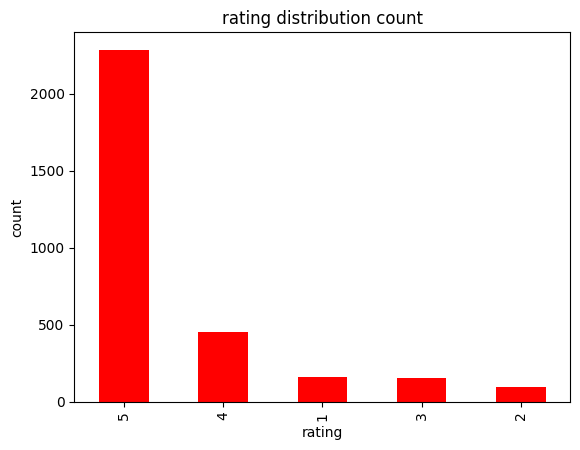

In [16]:

#bar plot to vitulaize the total counting of each rating

df['rating'].value_counts().plot.bar(color= 'red')
plt.title("rating distribution count")
plt.xlabel("rating")
plt.ylabel("count")

In [17]:
print(f"Rating value of percentage distribution \n{round(df['rating'].value_counts()/df.shape[0]*100, 2)}")

Rating value of percentage distribution 
rating
5    72.59
4    14.45
1     5.11
3     4.83
2     3.02
Name: count, dtype: float64


let plot above value in pie chart

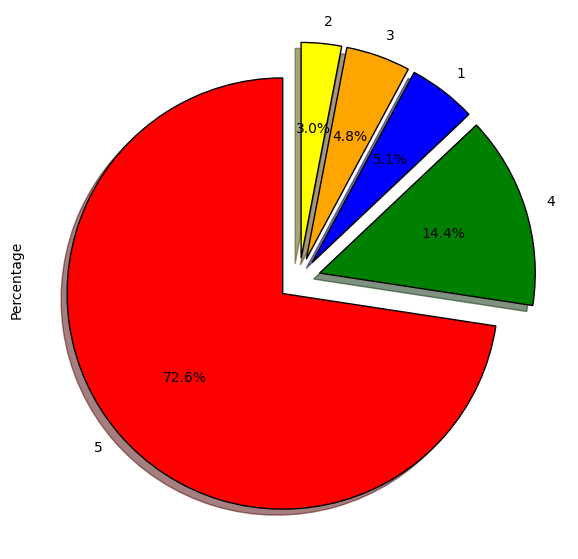

In [18]:
fig = plt.figure(figsize=(7,7))

colors = ('red', 'green', 'blue', 'orange', 'yellow')
wp = {'linewidth': 1, 'edgecolor': 'black'}

tags = df['rating'].value_counts() / df.shape[0]
explode = (0.1, 0.1, 0.1, 0.1, 0.1)

tags.plot(
    kind='pie',
    autopct="%1.1f%%",
    shadow=True,
    colors=colors,
    startangle=90,
    wedgeprops=wp,
    explode=explode,
    label='Percentage'
)

from io import BytesIO
graph = BytesIO()
fig.savefig(graph, format="png")



# analizing feedback

In [19]:
# Distinct values of 'feedback' and its count
print(f"Feedback value count: \n{df['feedback'].value_counts()}")


Feedback value count: 
feedback
1    2893
0     256
Name: count, dtype: int64


1 -> person gave the feed back , 0 -> person not gave feed back


In [20]:
# Extracting the 'verified_reviews' value for one record with feedback = 0
review_0 = df[df['feedback'] == 0].iloc[1]['verified_reviews']
print("Example negative review (feedback=0):", review_0)

Example negative review (feedback=0): Sound is terrible if u want good music too get a bose


In [21]:
# Extracting the 'verified_reviews' value for one record with feedback = 1
review_1 = df[df['feedback'] == 1].iloc[1]['verified_reviews']
print("Example positive review (feedback=1):", review_1)

Example positive review (feedback=1): Loved it!


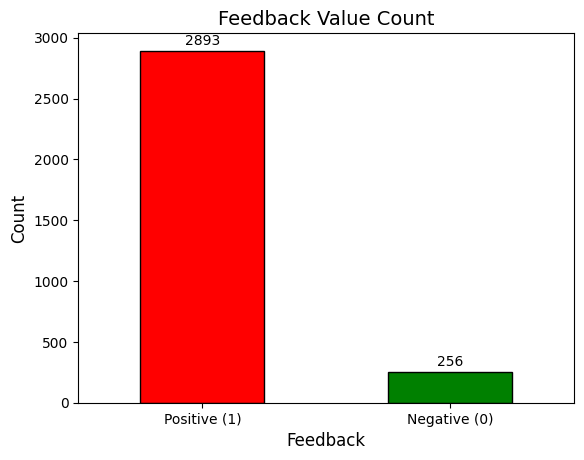

In [22]:
df['feedback'].value_counts().plot(kind='bar', color=['red', 'green'], edgecolor='black')
plt.title("Feedback Value Count", fontsize=14)
plt.xlabel("Feedback", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks([0,1], ["Positive (1)", "Negative (0)"], rotation=0)

# Show values on top of bars
for i, count in enumerate(df['feedback'].value_counts()):
    plt.text(i, count + 50, str(count), ha='center', fontsize=10)
plt.show()

# see the rating distribution grouped by feedback

In [23]:
df['rating_feedback'] = df['rating'].apply(lambda x: 0 if x in [1, 2] else 1)

In [24]:
# Feedback = 0
print("#Feedback = 0")
print(df[df['feedback'] == 0]['rating'].value_counts())

# Feedback = 1
print("\n#Feedback = 1")
print(df[df['feedback'] == 1]['rating'].value_counts())


#Feedback = 0
rating
1    161
2     95
Name: count, dtype: int64

#Feedback = 1
rating
5    2286
4     455
3     152
Name: count, dtype: int64


# analyzing variation column:



In [25]:
# Distinct values of 'variation' and its count
print(f"Variation value count:\n{df['variation'].value_counts()}")


Variation value count:
variation
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
Sandstone Fabric                 90
White                            90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: count, dtype: int64


Mean rating for each variation

In [26]:
mean_rating_by_variation = df.groupby('variation')['rating'].mean()
print(mean_rating_by_variation)

variation
Black                           4.233716
Black  Dot                      4.453488
Black  Plus                     4.370370
Black  Show                     4.490566
Black  Spot                     4.311203
Charcoal Fabric                 4.730233
Configuration: Fire TV Stick    4.591429
Heather Gray Fabric             4.694268
Oak Finish                      4.857143
Sandstone Fabric                4.355556
Walnut Finish                   4.888889
White                           4.166667
White  Dot                      4.423913
White  Plus                     4.358974
White  Show                     4.282353
White  Spot                     4.311927
Name: rating, dtype: float64


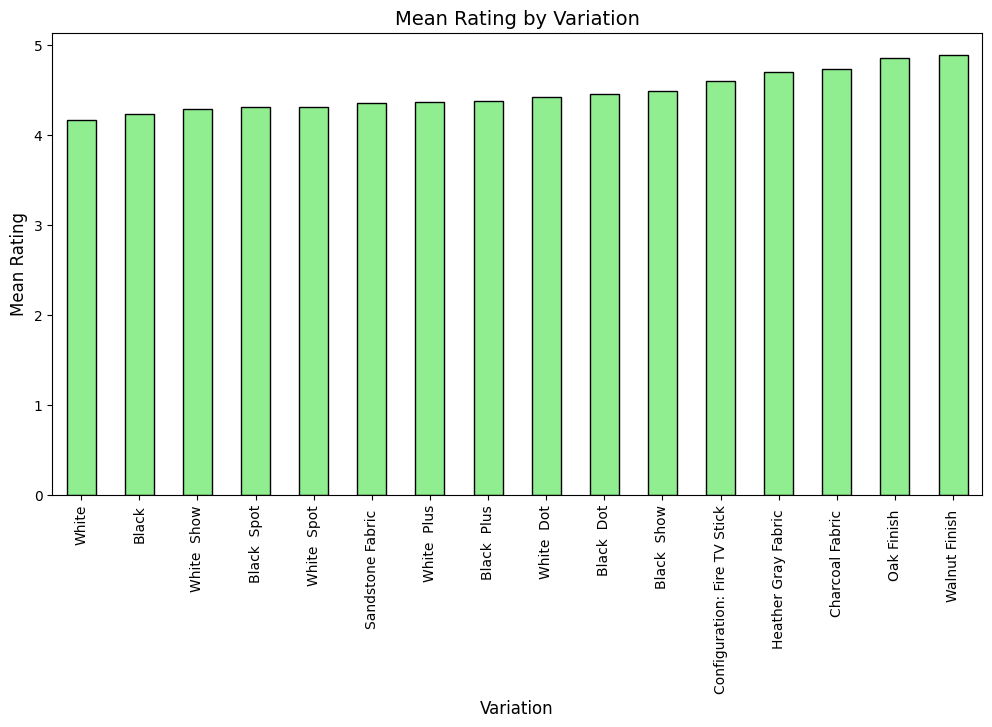

In [27]:
plt.figure(figsize=(12,6))
mean_rating_by_variation.sort_values().plot(kind='bar', color='lightgreen', edgecolor='black')

plt.title("Mean Rating by Variation", fontsize=14)
plt.xlabel("Variation", fontsize=12)
plt.ylabel("Mean Rating", fontsize=12)
plt.xticks(rotation=90)
plt.show()

# review length analysis

In [28]:
df['length'].describe()

count    3149.000000
mean      132.090187
std       182.114569
min         1.000000
25%        30.000000
50%        74.000000
75%       165.000000
max      2851.000000
Name: length, dtype: float64

<Axes: xlabel='length', ylabel='Count'>

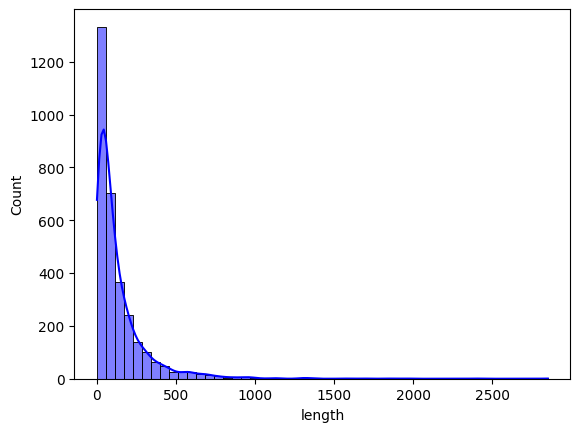

In [29]:
import seaborn as sns
sns.histplot(df['length'], bins=50, color='blue', kde=True)

# Negative feedback (0)

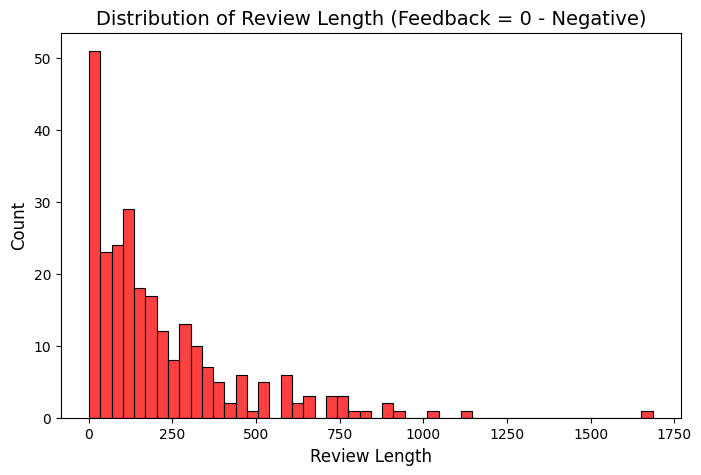

In [30]:
plt.figure(figsize=(8,5))
sns.histplot(df[df['feedback'] == 0]['length'], color='red', bins=50)
plt.title("Distribution of Review Length (Feedback = 0 - Negative)", fontsize=14)
plt.xlabel("Review Length", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

# Positive feedback (1)

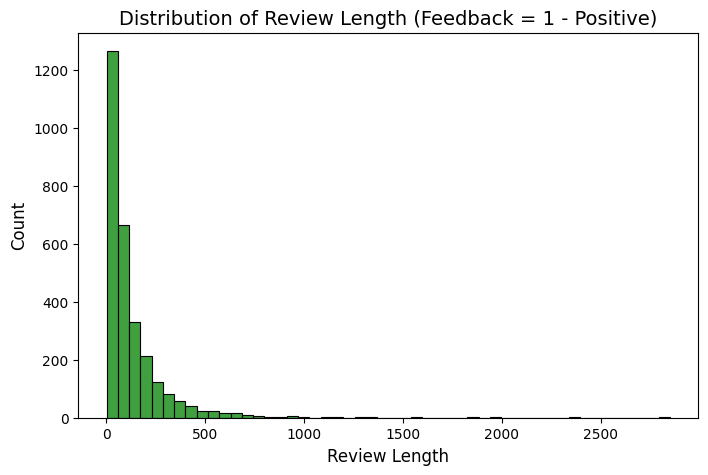

In [31]:
plt.figure(figsize=(8,5))
sns.histplot(df[df['feedback'] == 1]['length'], color='green', bins=50)
plt.title("Distribution of Review Length (Feedback = 1 - Positive)", fontsize=14)
plt.xlabel("Review Length", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

# mean rating based on review length

In [32]:
# Group reviews by length and calculate mean rating
length_mean_rating = df.groupby("length")["rating"].mean().reset_index()

print(length_mean_rating.head())


   length    rating
0       1  3.716049
1       2  5.000000
2       3  4.000000
3       4  4.785714
4       5  4.823529


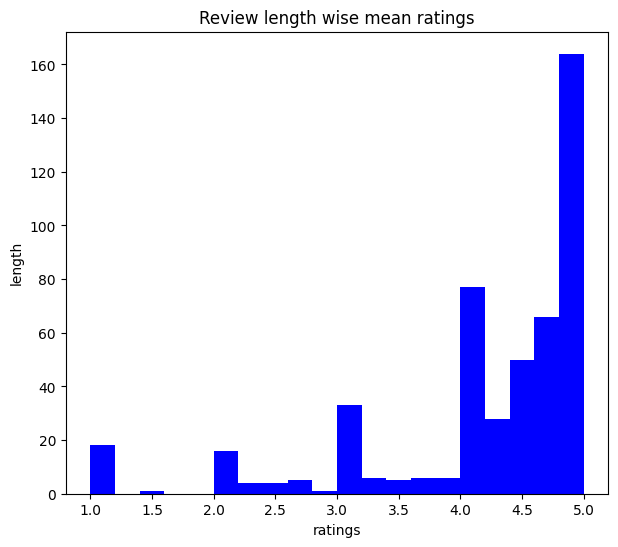

In [33]:

df.groupby('length')['rating'].mean().plot.hist(
    color='blue',
    figsize=(7,6),
    bins=20
)

plt.title("Review length wise mean ratings")
plt.xlabel('ratings')
plt.ylabel('length')
plt.show()


/tmp/ipykernel_34705/2450436210.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_rating_by_bin = df.groupby('length_bin')['rating'].mean()


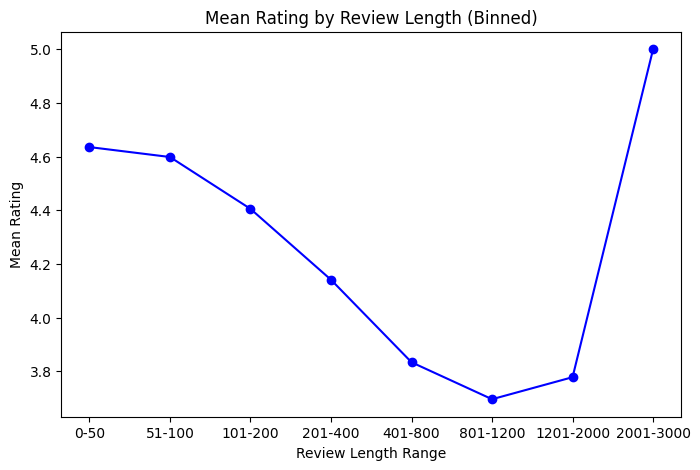

In [34]:
bins = [0, 50, 100, 200, 400, 800, 1200, 2000, 3000]
labels = ["0-50","51-100","101-200","201-400","401-800","801-1200","1201-2000","2001-3000"]

df['length_bin'] = pd.cut(df['length'], bins=bins, labels=labels, include_lowest=True)

mean_rating_by_bin = df.groupby('length_bin')['rating'].mean()

mean_rating_by_bin.plot(kind='line', marker='o', figsize=(8,5), color='blue')
plt.title("Mean Rating by Review Length (Binned)")
plt.xlabel("Review Length Range")
plt.ylabel("Mean Rating")
plt.show()



# a WordCloud of all verified reviews

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

In [36]:
# Step 1: Initialize CountVectorizer with English stopwords
cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(df['verified_reviews'])

In [37]:
# Step 2: Combine all reviews into one big string
reviews = " ".join([review for review in df['verified_reviews']])

# Step 3: Initialize WordCloud object
wc = WordCloud(background_color='white', max_words=50)

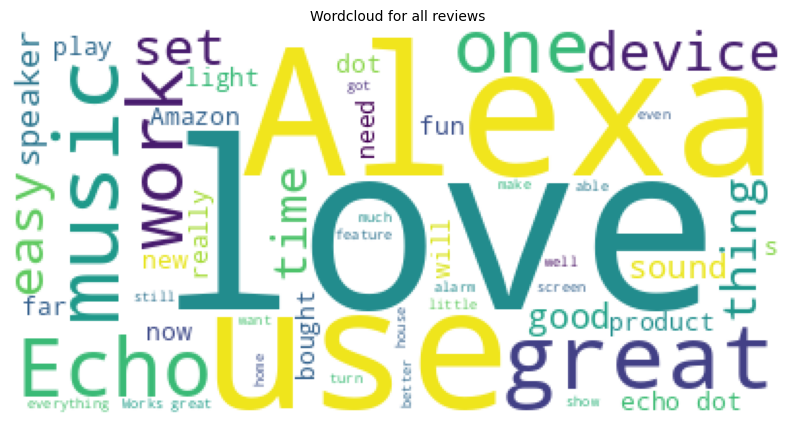

In [38]:
# Step 4: Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for all reviews', fontsize=10)
plt.axis('off')
plt.show()

# finds unique words.

In [39]:
import re

In [40]:
# Function to clean and split text
def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z\s]", "", text)   # remove punctuation/numbers
    return text.split()


In [41]:
# Combine negative reviews
neg_reviews = " ".join(df[df['feedback'] == 0]['verified_reviews'])
neg_reviews = clean_text(neg_reviews)
print(neg_reviews)

['its', 'like', 'siri', 'in', 'fact', 'siri', 'answers', 'more', 'accurately', 'then', 'alexa', 'i', 'dont', 'see', 'a', 'real', 'need', 'for', 'it', 'in', 'my', 'household', 'though', 'it', 'was', 'a', 'good', 'bargain', 'on', 'prime', 'day', 'deals', 'sound', 'is', 'terrible', 'if', 'u', 'want', 'good', 'music', 'too', 'get', 'a', 'bose', 'not', 'much', 'features', 'stopped', 'working', 'after', 'weeks', 'didnt', 'follow', 'commands', 'really', 'fun', 'when', 'it', 'was', 'working', 'sad', 'joke', 'worthless', 'really', 'disappointed', 'alexa', 'has', 'to', 'be', 'plugin', 'to', 'wall', 'socket', 'all', 'the', 'time', 'my', 'fault', 'for', 'not', 'checking', 'this', 'but', 'made', 'the', 'assumption', 'that', 'a', 'company', 'has', 'technologically', 'advanced', 'as', 'amazon', 'would', 'sell', 'this', 'product', 'with', 'a', 'rechargeable', 'battery', 'if', 'i', 'could', 'return', 'it', 'i', 'would', 'as', 'my', 'apple', 'music', 'and', 'boom', 'speaker', 'give', 'me', 'more', 'flex

In [42]:
# Combine positive reviews
pos_reviews = " ".join(df[df['feedback'] == 1]['verified_reviews'])
pos_reviews = clean_text(pos_reviews)
print(pos_reviews)

['love', 'my', 'echo', 'loved', 'it', 'sometimes', 'while', 'playing', 'a', 'game', 'you', 'can', 'answer', 'a', 'question', 'correctly', 'but', 'alexa', 'says', 'you', 'got', 'it', 'wrong', 'and', 'answers', 'the', 'same', 'as', 'you', 'i', 'like', 'being', 'able', 'to', 'turn', 'lights', 'on', 'and', 'off', 'while', 'away', 'from', 'home', 'i', 'have', 'had', 'a', 'lot', 'of', 'fun', 'with', 'this', 'thing', 'my', 'yr', 'old', 'learns', 'about', 'dinosaurs', 'i', 'control', 'the', 'lights', 'and', 'play', 'games', 'like', 'categories', 'has', 'nice', 'sound', 'when', 'playing', 'music', 'as', 'well', 'music', 'i', 'received', 'the', 'echo', 'as', 'a', 'gift', 'i', 'needed', 'another', 'bluetooth', 'or', 'something', 'to', 'play', 'music', 'easily', 'accessible', 'and', 'found', 'this', 'smart', 'speaker', 'cant', 'wait', 'to', 'see', 'what', 'else', 'it', 'can', 'do', 'without', 'having', 'a', 'cellphone', 'i', 'cannot', 'use', 'many', 'of', 'her', 'features', 'i', 'have', 'an', 'ipa

In [43]:
# Find unique words
unique_negative = set(neg_reviews) - set(pos_reviews)
print(unique_negative)
unique_positive = set(pos_reviews) - set(neg_reviews)
print(unique_positive)

{'mids', 'luck', 'las', 'buld', 'dec', 'americans', 'positives', 'strange', 'standalone', 'guaranteeing', 'connectingcheck', 'intendedi', 'o', 'acknowledge', 'baffled', 'viceo', 'apparentlylong', 'screenless', 'therefore', 'cycled', 'cracked', 'sprint', 'additionally', 'batteries', 'punch', 'rare', 'suggests', 'rcieved', 'exception', 'unusable', 'spanish', 'regularly', 'final', 'sending', 'needing', 'ii', 'disable', 'etcuntil', 'toward', 'reboot', 'rainand', 'garbageeven', 'upsetting', 'standards', 'motown', 'touching', 'rokus', 'spam', 'spanking', 'lame', 'characteristics', 'crashed', 'productwas', 'looses', 'critically', 'posed', 'roll', 'musicprime', 'homescreen', 'screw', 'xbox', 'tec', 'discounts', 'horrible', 'texas', 'stimulus', 'forecast', 'junkthey', 'onetill', 'myselfi', 'widespread', 'load', 'againi', 'logo', 'shouldve', 'birth', 'tiene', 'networktechnology', 'thru', 'pelculas', 'approximately', 'native', 'massive', 'maddening', 'trending', 'incredibly', 'reached', 'broken',

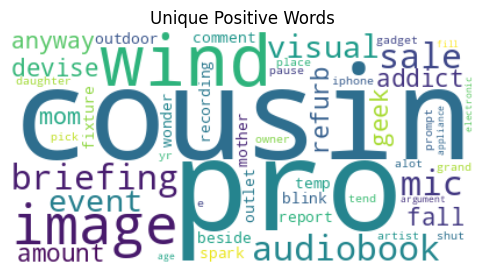

In [44]:
# WordCloud for positive
wc = WordCloud(background_color='white', max_words=50).generate(" ".join(unique_positive))
plt.figure(figsize=(6,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Unique Positive Words")
plt.show()

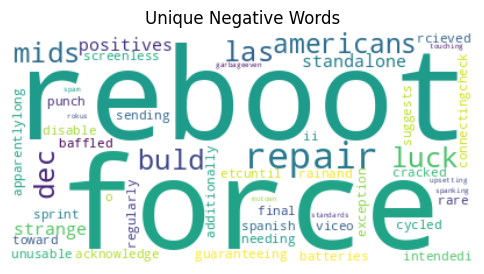

In [45]:
# WordCloud for negative
wc = WordCloud(background_color='white', max_words=50).generate(" ".join(unique_negative))
plt.figure(figsize=(6,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Unique Negative Words")
plt.show()

# Preprocessing and Modelling
What the Code Does

Text Cleaning

Remove non-alphabet characters (re.sub('[^a-zA-Z]', ' ', text))

Convert to lowercase

Split into words

Stopword Removal & Stemming

Remove stopwords (like is, the, and, of)

Apply stemming (reduce words to their root form, e.g., running → run)

Corpus Creation

Store the cleaned reviews in a list called corpus

Bag of Words (BOW)

Use CountVectorizer to convert text into numerical features (word counts).


import re
import nltk

In [46]:
import re
import nltk
import pickle
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer


In [47]:
# Download stopwords (only first time)
nltk.download("stopwords")

# Initialize stemmer
stemmer = PorterStemmer()


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/sudarshan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [89]:
# Create corpus
corpus = []
for i in range(0, df.shape[0]):
    # Step 1: Remove non-letters
    review = re.sub('[^a-zA-Z]', ' ', df.iloc[i]['verified_reviews'])
    
    # Step 2: Lowercase and split
    review = review.lower().split()
    
    # Step 3: Remove stopwords + stemming
    review = [stemmer.stem(word) for word in review if word not in stopwords.words('english')]
    
    # Step 4: Join back into one string
    review = ' '.join(review)
    corpus.append(review)

print("Sample cleaned review:", corpus[0])

# Step 5: Bag of Words (BOW)
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()

# Labels (target variable)
y = df['feedback'].values
#Saving the Count Vectorizer
pickle.dump(cv, open('Models/countVectorizer.pkl', 'wb'))

print("Shape of X (features):", X.shape)
print("Shape of y (labels):", y.shape)

Sample cleaned review: love echo
Shape of X (features): (3149, 2500)
Shape of y (labels): (3149,)


# train_test_split
test_size=0.3 → 30% of data goes to testing, 70% to training.

random_state=15 → ensures reproducibility (same split every time).
 Print shapes

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [50]:
# Split data into train (70%) and test (30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=15
)

# Print shapes
print(f"X train: {X_train.shape}")
print(f"y train: {y_train.shape}")
print(f"X test: {X_test.shape}")
print(f"y test: {y_test.shape}")

X train: (2204, 2500)
y train: (2204,)
X test: (945, 2500)
y test: (945,)


Print max values

In [51]:
# Check max values before scaling
print(f"X train max value: {X_train.max()}")
print(f"X test max value: {X_test.max()}")

X train max value: 12
X test max value: 10


MinMaxScaler


In [52]:
# Scale X so values lie between 0 and 1
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Check max values after scaling
print(f"X train max after scaling: {X_train.max()}")
print(f"X test max after scaling: {X_test.max()}")

X train max after scaling: 1.0
X test max after scaling: 4.0


✅ Save the Scaler

In [53]:
# Create the folder if it doesn't exist
os.makedirs("Models", exist_ok=True)

with open("Models/scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)
print("Scaler saved successfully ✅")    

Scaler saved successfully ✅


# Random Forest Classifier

# 1. Train Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn.model_selection import cross_validate
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

In [55]:

model_rf = RandomForestClassifier(random_state=42, n_estimators=100)  # you can add parameters if needed
model_rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [56]:
# 2. Accuracy
print("Training Accuracy :", model_rf.score(X_train, y_train))
print("Testing Accuracy  :", model_rf.score(X_test, y_test))


Training Accuracy : 0.9941016333938294
Testing Accuracy  : 0.946031746031746


In [57]:
# 3. Predictions
y_preds = model_rf.predict(X_test)


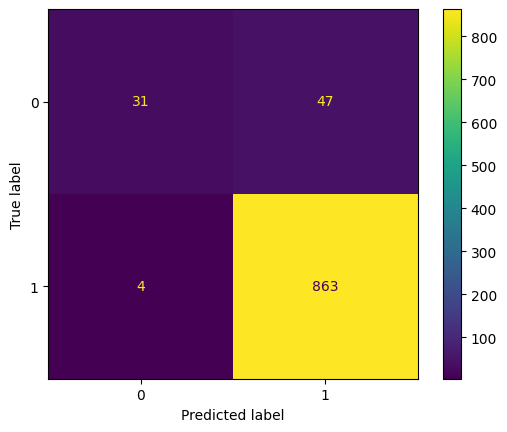


Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.40      0.55        78
           1       0.95      1.00      0.97       867

    accuracy                           0.95       945
   macro avg       0.92      0.70      0.76       945
weighted avg       0.94      0.95      0.94       945



In [58]:
# 4. Confusion Matrix
cm = confusion_matrix(y_test, y_preds)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_rf.classes_)
cm_display.plot()
plt.show()
# 5. Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_preds))

In [59]:
# Create Models folder if not exists
os.makedirs("Models", exist_ok=True)

# Save Random Forest model
with open("Models/random_forest.pkl", "wb") as f:
    pickle.dump(model_rf, f)

print("Random Forest model saved successfully ✅")

Random Forest model saved successfully ✅


# Loading Later (for predictions)

In [62]:
# Load the saved model
with open("Models/random_forest.pkl", "rb") as f:
    loaded_model = pickle.load(f)

# Example prediction
print("Sample Prediction:", loaded_model.predict(X_test[:5]))


Sample Prediction: [1 1 1 1 1]


- K-Fold Cross Validation with GridSearchCV
    1. Define the parameter grid


In [65]:
params = {
    'bootstrap': [True],
    'max_depth': [80, 100],
    'min_samples_split': [8, 12],
    'n_estimators': [100, 300]
}


In [66]:
cv_object = StratifiedKFold(n_splits=2)

+ Apply GridSearchCV with RandomForest

In [67]:
# Base model
model_rf = RandomForestClassifier(random_state=42)

In [68]:
# Grid Search
grid_search = GridSearchCV(
    estimator=model_rf,
    param_grid=params,
    cv=cv_object,
    verbose=1,
    n_jobs=-1,           # parallel jobs (faster)
    return_train_score=True
)

# Fit
grid_search.fit(X_train, y_train.ravel())

Fitting 2 folds for each of 8 candidates, totalling 16 fits


,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'bootstrap': [True], 'max_depth': [80, 100], 'min_samples_split': [8, 12], 'n_estimators': [100, 300]}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,StratifiedKFo...shuffle=False)
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,n_estimators,100


- Best parameters & accuracy


In [69]:
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)
cv_results = cross_validate(model_rf, X_train, y_train, cv=5, return_train_score=True)
print("Cross validation mean accuracy on train set : {:.2f}%".format(cv_results['train_score'].mean()*100))
print("Cross validation mean accuracy on test set  : {:.2f}%".format(cv_results['test_score'].mean()*100))


Best Parameters: {'bootstrap': True, 'max_depth': 100, 'min_samples_split': 8, 'n_estimators': 100}
Best Cross-Validation Score: 0.9237749546279492


Cross validation mean accuracy on train set : 99.39%
Cross validation mean accuracy on test set  : 92.92%


# XgBoost

In [70]:
# Train XGBoost
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [71]:

# Predictions
y_preds_xgb = model_xgb.predict(X_test)


In [72]:

# Accuracy of the model on training and testing data
print("Training Accuracy :", model_xgb.score(X_train, y_train))
print("Testing Accuracy  :", model_xgb.score(X_test, y_test))


Training Accuracy : 0.9718693284936479
Testing Accuracy  : 0.9375661375661376


In [73]:
y_preds = model_xgb.predict(X_test)


# confusion matrix

Confusion Matrix:
 [[ 30  48]
 [ 11 856]]


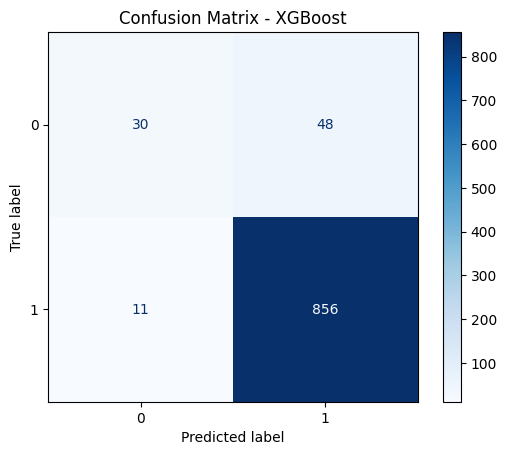

In [74]:
# Step 2: Compute confusion matrix
cm = confusion_matrix(y_test, y_preds)
# Step 3: Display confusion matrix as text
print("Confusion Matrix:\n", cm)

# Step 4: Plot confusion matrix
disp_display = ConfusionMatrixDisplay(confusion_matrix=cm)
disp_display.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - XGBoost")
plt.show()

In [85]:
# Step 2: Save the model using pickle
with open("Models/model_xgb.pkl", "wb") as file:
    pickle.dump(model_xgb, file)
print("✅ XGBoost model saved as model_xgb.pkl")    

✅ XGBoost model saved as model_xgb.pkl


In [86]:
# Step 3: Load the saved model (when needed)
with open("Models/model_xgb.pkl", "rb") as file:
    loaded_xgb = pickle.load(file)

# Step 4: Test the loaded model
y_preds_loaded = loaded_xgb.predict(X_test)
print("Accuracy of loaded model:", accuracy_score(y_test, y_preds_loaded))

Accuracy of loaded model: 0.9375661375661376


# Decision Tree Classifier

In [87]:

# Step 1: Initialize and train the model
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)

# Step 2: Predictions
y_preds_dt = model_dt.predict(X_test)

# Step 3: Accuracy
print("Training Accuracy :", model_dt.score(X_train, y_train))
print("Testing Accuracy  :", model_dt.score(X_test, y_test))
# Step 4: Classification report
print("\nClassification Report:\n", classification_report(y_test, y_preds_dt))


Training Accuracy : 0.9941016333938294
Testing Accuracy  : 0.9227513227513228

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.54      0.54        78
           1       0.96      0.96      0.96       867

    accuracy                           0.92       945
   macro avg       0.75      0.75      0.75       945
weighted avg       0.92      0.92      0.92       945




Confusion Matrix:
 [[ 42  36]
 [ 37 830]]


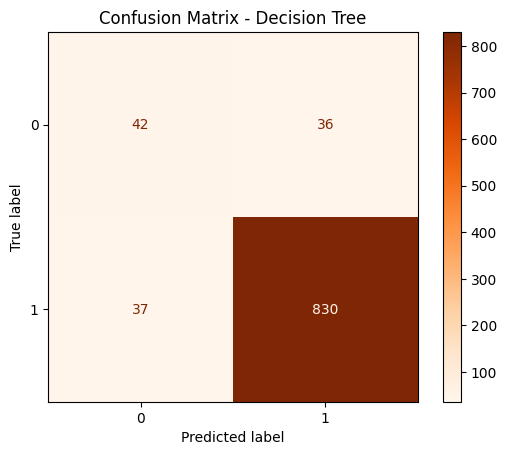

In [88]:
# Step 5: Confusion matrix
cm = confusion_matrix(y_test, y_preds_dt)
print("\nConfusion Matrix:\n", cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Oranges)
plt.title("Confusion Matrix - Decision Tree")
plt.show()
# Save the trained model
with open("Models/decision_tree.pkl", "wb") as f:
    pickle.dump(model_dt, f)
    
    